In [1]:

import numpy as np
    


In [3]:
import pandas as pd
df = pd.read_csv("1710960555578O-result.csv")
BP_RP = df.bp_rp #you can also use df['column_name']



The average distance of the stars in M13 is 7374.354504659394 pc


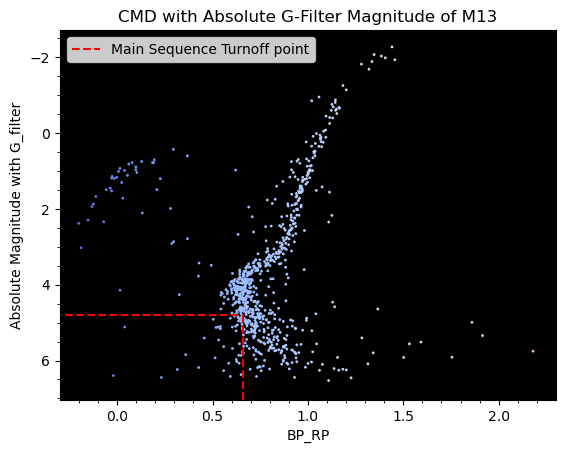

The absolute magnitude for the main sequence turn off star is:4.819
The age of the M13 cluster is:11.009 billion years


In [7]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colormaps
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

source_id ,ra , dec, parallax, parallax_error, pmra,pmdec,mean_mag,bp_rp, radial_v = np.genfromtxt("1710960555578O-result.csv", dtype=float, delimiter=',' , unpack=True, filling_values=0, skip_header=1)



        
       
        

        
        
        
###Filter out the none cluster stars

max_pc=1000/(7400-550)
min_pc=1000/(7400+550)
#print(max_pc)
#print(min_pc)
       
BP_RP=[]
GMag=[]
distance=[]
star_id=[]
par_lax=[]
for i in range(len(parallax)): 
    if parallax[i] > min_pc and parallax[i] < max_pc and  bp_rp[i] != 0 and GMag != "x":
        BP_RP.append(bp_rp[i])
        GMag.append(mean_mag[i])
        distance.append(parallax[i])
        star_id.append(source_id[i])
        par_lax.append(parallax[i])
    else: 
        star_id.append(0)
#print(BP_RP)  



###checking how many stars
star_count=0
for i in BP_RP:
    star_count += 1
    
#print(star_count)



###Average distance 

total_d=0
for i in range(len(par_lax)):
    total_d += (1000/par_lax[i])
    
#print(total_d)

Ave_d=total_d/star_count

print("The average distance of the stars in M13 is",Ave_d,"pc")









###Change to absolute GMag
GMag_ab=[]
for i in range(len(GMag)):
        
    abs=GMag[i]-5*np.log10((1000/(distance[i]))/10)
    GMag_ab.append(abs)

    




###plot the Color magnitude diagram          


fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(BP_RP,GMag_ab, s=1, c=BP_RP, cmap = 'coolwarm')
ax.set_title('CMD with Absolute G-Filter Magnitude of M13', color = 'black')

ax.set_facecolor('xkcd:black')
ax.invert_yaxis()
plt.xlim(-0.3,2.3)
plt.minorticks_on()
plt.axhline(y=4.8, color='r', linestyle='--',xmin=-0.3, xmax = 0.36)
plt.axvline(x=0.66, color='r', linestyle='--',ymax=0.235,label="Main Sequence Turnoff point")
plt.xlabel("BP_RP")
plt.ylabel("Absolute Magnitude with G_filter")
plt.legend()
plt.show()



###calculate years of M13

#Find Main Sequence Turn off Star by finding a star closest to the turnoff point
turn_off_mag=[]
for i in range(len(BP_RP)):
    if BP_RP[i] > 0.655 and BP_RP[i] < 0.665 and GMag_ab[i] > 4.75 and GMag_ab[i] < 4.85:
        turn_off_mag.append(GMag_ab[i])
        
   

#Find age now with the equations

turn_off_Mag=4.819150072069675   
print('The absolute magnitude for the main sequence turn off star is:{0:.3f}'.format(turn_off_Mag))


def Age(mag):
    return 10*(10**((mag-4.68)/(-2.5)))**(-3/4)


print('The age of the M13 cluster is:{0:.3f}'.format(Age(turn_off_Mag)),'billion years')

#cite this: https://faculty.washington.edu/ivezic/REU08/GDP/distance/background3.html#:~:text=The%20main%20sequence%20turn%20off%20is%20defined%20as%20the%20point,veering%20off%20to%20the%20right.

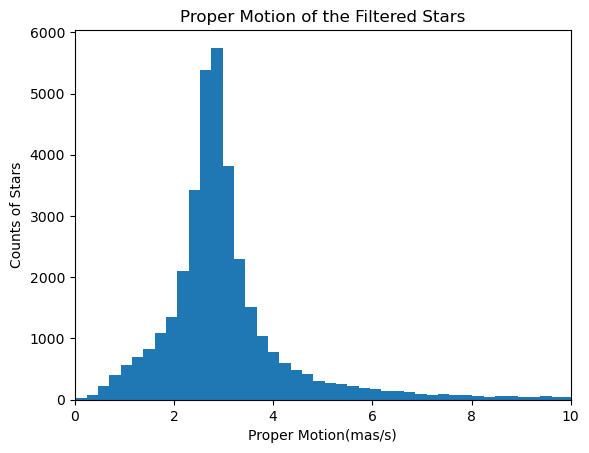

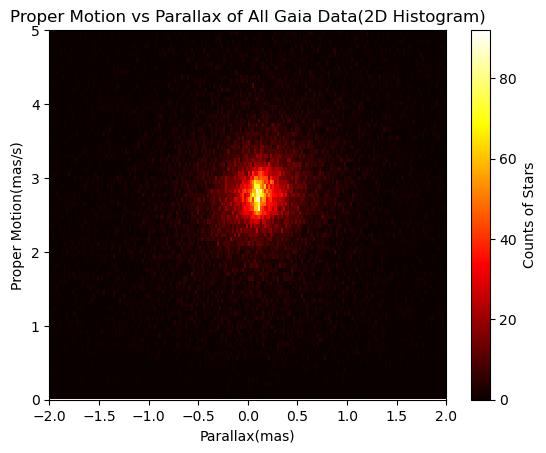

In [12]:
###Filtering with motion

prop_m=[]
par_m=[]
prop_mf=[]
par_mf=[]
counter=0
for i in range(len(pmra)):
    if pmra[i] != 0 and pmdec[i] != 0:
        x=np.sqrt(pmdec[i]**2+(pmra[i]*np.cos(dec[i]))**2)
        prop_m.append(x)
        par_m.append(parallax[i])
        counter += 1
        if star_id[i] == source_id[i]:
            prop_mf.append(x)
            par_mf.append(parallax[i])

#print(prop_mf)        

#plt.hist(par_mf,bins=len(par_mf))
plt.hist(prop_m,bins=len(prop_mf))
plt.title("Proper Motion of the Filtered Stars")
plt.xlabel("Proper Motion(mas/s)")
plt.ylabel("Counts of Stars")
plt.xlim(0,10)
plt.show()




plt.hist2d(par_m,prop_m,bins=3000, cmap = 'hot')
plt.title("Proper Motion vs Parallax of All Gaia Data(2D Histogram)")
plt.xlabel("Parallax(mas)")
plt.ylabel("Proper Motion(mas/s)")
plt.xlim(-2,2)
plt.ylim(0,5)
plt.colorbar(label="Counts of Stars")
plt.show()


In [11]:
###TRGB

trgb=[]
#for i in range(len(bp_rp)):
#    if bp_rp[i] > 1.4 and bp_rp[i] < 1.5 and mean_mag[i] > -2.5 and mean_mag[i] < -1.8:
#        trgb.append(mean_mag[i])
        
print(trgb)

###find distance 
Mag=-3
def d_trgb(mag):
    return 10*(10**((mag-Mag)/5))

print(d_trgb(12.218655))


###Parallax error

print(1000/np.std(parallax_error))


    

[]
11059.385585420348
2755.7038640371775
